In [ ]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
path='/content/drive/MyDrive/Colab Notebooks/questions.csv'
df=pd.read_csv(path)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
new_df=df.sample(n=30000,random_state=2)

In [ ]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
new_df.duplicated().sum()

np.int64(0)

is_duplicate
0    18918
1    11082
Name: count, dtype: int64
is_duplicate
0    63.06
1    36.94
Name: proportion, dtype: float64


<Axes: xlabel='is_duplicate'>

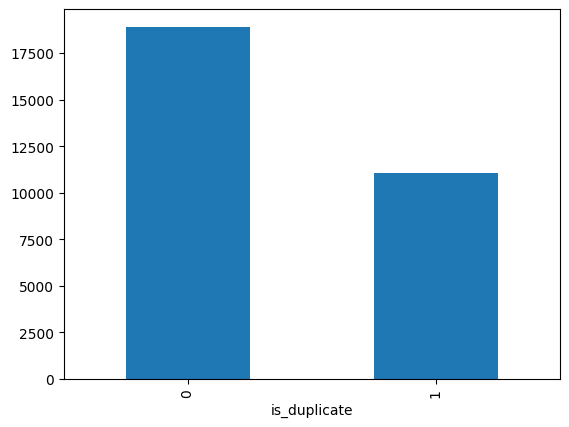

In [ ]:
print(new_df['is_duplicate'].value_counts())
print(new_df['is_duplicate'].value_counts(normalize=True).mul(100))
new_df['is_duplicate'].value_counts().plot(kind='bar')


In [11]:
qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print(qid.value_counts())

26304     6
11823     5
1600      4
40765     4
362740    4
         ..
77375     1
720997    1
299683    1
417237    1
535972    1
Name: count, Length: 59795, dtype: int64


In [12]:
print(np.unique(qid).shape[0])

59795


In [ ]:
x=qid.value_counts()>1
print("getting q repeated more than 1 time",x[x].shape[0])


which q rpt about which times

In [ ]:
plt.hist(qid.value_counts().values,bins=16)
plt.yscale('log')
plt.show()

feature engineering

In [ ]:
# 2 ta q add korlam
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()


In [13]:
new_df['q1_num_words']=new_df['question1'].str.len()
new_df['q2_num_words']=new_df['question2'].str.len()

In [15]:
def common_words(row):#total row pas korbo (q1 and q2) then tader intersection kore common words ber korbo
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(' ')))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(' ')))
  return len(w1&w2)

In [17]:
new_df['word_total']=new_df.apply(common_words,axis=1)
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,word_total
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,4
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,2
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,20
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,5
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,3


In [21]:
new_df['word_share']=round(new_df['word_total']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,word_total,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,4,1.0
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,2,1.0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,20,1.0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,5,1.0
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,3,1.0


# **analysis of features**

/tmp/ipython-input-23-1569463955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q1_num_words'])


minimum characters 2
maximum characters 332
average characters 59


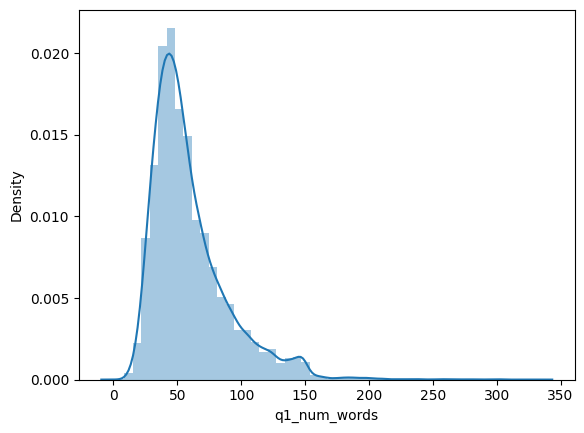

In [23]:
sns.distplot(new_df['q1_num_words'])
print("minimum characters",new_df['q1_num_words'].min())
print("maximum characters",new_df['q1_num_words'].max())
print("average characters",int(new_df['q1_num_words'].mean()))

/tmp/ipython-input-24-1735388570.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q2_num_words'])


minimum characters 3
maximum characters 1151
average characters 59


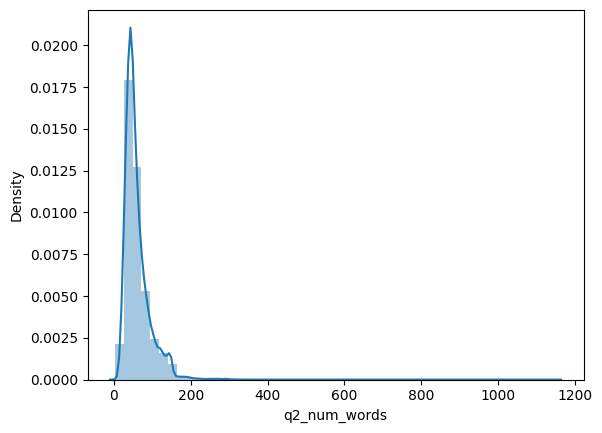

In [24]:
sns.distplot(new_df['q2_num_words'])
print("minimum characters",new_df['q2_num_words'].min())
print("maximum characters",new_df['q2_num_words'].max())
print("average characters",int(new_df['q2_num_words'].mean()))

/tmp/ipython-input-26-358075487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q1_num_words'])


minimum words 2
maximum words 332
average words 59


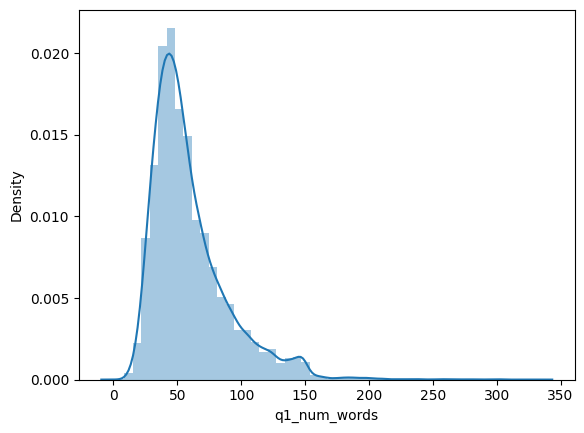

In [26]:
sns.distplot(new_df['q1_num_words'])
print("minimum words",new_df['q1_num_words'].min())
print("maximum words",new_df['q1_num_words'].max())
print("average words",int(new_df['q1_num_words'].mean()))

/tmp/ipython-input-27-750724536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q2_num_words'])


minimum words 3
maximum words 1151
average words 59


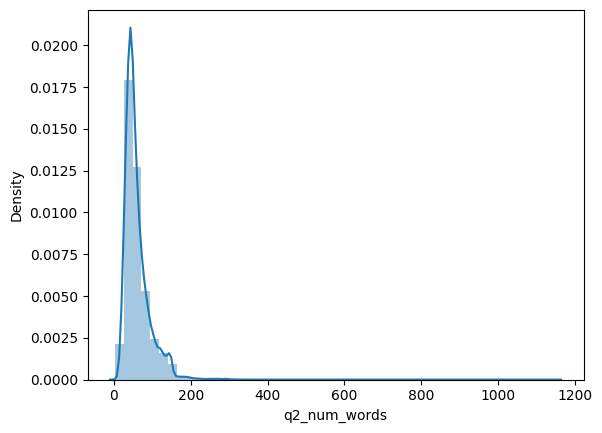

In [27]:
sns.distplot(new_df['q2_num_words'])
print("minimum words",new_df['q2_num_words'].min())
print("maximum words",new_df['q2_num_words'].max())
print("average words",int(new_df['q2_num_words'].mean()))

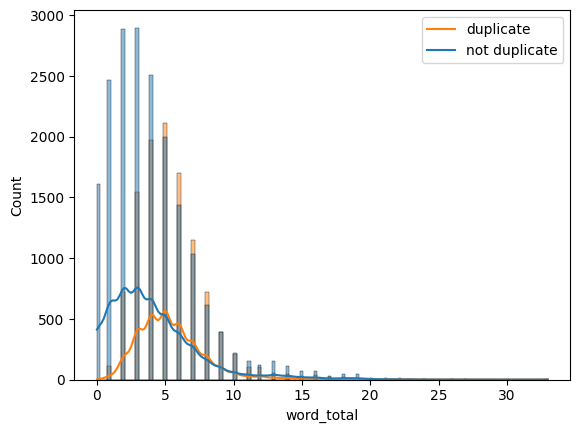

In [29]:
sns.histplot(data=new_df, x='word_total', hue='is_duplicate', kde=True)
plt.legend(labels=['duplicate', 'not duplicate'])
plt.show()

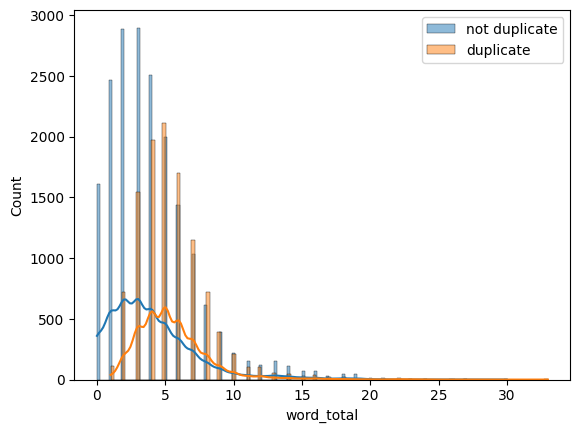

In [31]:
#total words
sns.histplot(data=new_df[new_df['is_duplicate']==0], x='word_total', label='not duplicate', kde=True)
sns.histplot(data=new_df[new_df['is_duplicate']==1], x='word_total', label='duplicate', kde=True)
plt.legend()
plt.show()

total words

/tmp/ipython-input-32-1428127620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'], label='not duplicate')
/tmp/ipython-input-32-1428127620.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'], label

<function matplotlib.pyplot.show(close=None, block=None)>

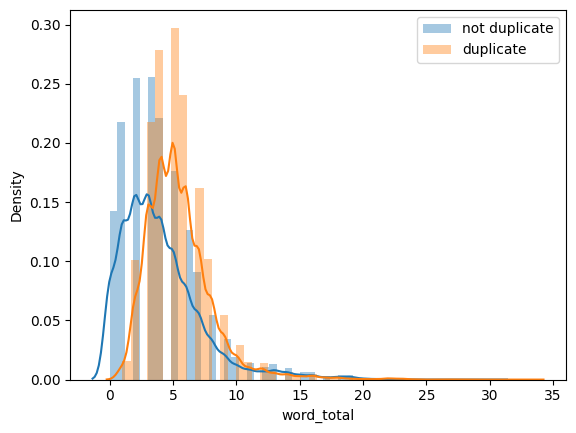

In [32]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'], label='not duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'], label='duplicate')
plt.legend()
plt.show

In [33]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [34]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 5)


,is_duplicate,q1_num_words,q2_num_words,word_total,word_share
339499,1,58,42,4,1.0
289521,0,52,105,2,1.0
4665,0,125,124,20,1.0
54203,1,45,60,5,1.0
132566,0,54,39,3,1.0


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [36]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)

total words

In [39]:
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [40]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6005)


,is_duplicate,q1_num_words,q2_num_words,word_total,word_share,0,1,2,3,4,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,4,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,20,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,5,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,3,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=2)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.767

In [43]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.763